# Multiple Linear Regression Model with categorical variable
### Author : MD. Mehedi Hassan Galib
### Date : 02 August, 2020
<br/>
<br/>
<br/>

## Loading Library

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<br/>

## Loading the dataset

In [17]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<br/>

## Reconnaissance and dealing with missing values

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df2 = df.fillna(df.mean)

In [6]:
df2.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

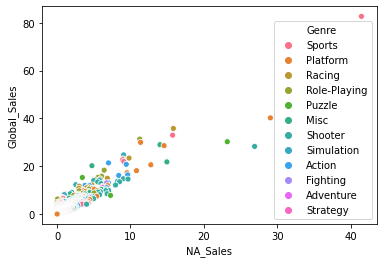

In [33]:
sns.scatterplot(x = df.NA_Sales, y = df.Global_Sales, hue = df.Genre)
plt.show()

<br/>

## Converting to Dummy variables

In [8]:
df2 = pd.get_dummies(df, columns = ['Genre'])
df2

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,Wii Sports,Wii,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,...,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0,0,1,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,...,0,0,0,0,1,0,0,0,0,0
3,4,Wii Sports Resort,Wii,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,...,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Kemco,0.01,0.00,0.00,0.00,0.01,...,0,0,1,0,0,0,0,0,0,0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Infogrames,0.01,0.00,0.00,0.00,0.01,...,0,0,0,0,0,0,1,0,0,0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Activision,0.00,0.00,0.00,0.00,0.01,...,0,0,0,0,1,0,0,0,0,0
16596,16599,Know How 2,DS,2010.0,7G//AMES,0.00,0.01,0.00,0.00,0.01,...,0,0,0,1,0,0,0,0,0,0


<br/>

## Splitting Explanatory and Response variables

In [9]:
X = pd.DataFrame(df2[['NA_Sales','EU_Sales','Genre_Sports','Genre_Platform','Genre_Racing','Genre_Role-Playing','Genre_Puzzle',
                      'Genre_Misc','Genre_Shooter','Genre_Simulation','Genre_Action','Genre_Fighting','Genre_Adventure','Genre_Strategy']])
y = pd.DataFrame(df2.Global_Sales)

<br/>

## Splitting Train and Test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

<br/>

## Model Build up

In [11]:
lm = LinearRegression()
modeel = lm.fit(X_train,y_train)

<br/>

## R-Squared value

In [12]:
lm.score(X_train,y_train)

0.9694308005655092

<br/>

## Prediction

In [13]:
y_pred = lm.predict(X_test)
y_pred

array([[0.09361267],
       [0.37658691],
       [0.14181519],
       ...,
       [1.83140564],
       [1.1280365 ],
       [0.56976318]])